In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('train.csv')
data = data.drop(['Electrical'],axis=1)

In [3]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
      

### data visualization

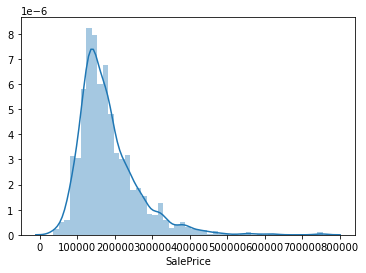

In [4]:
sns.distplot(data['SalePrice'] 
             ,hist=True)


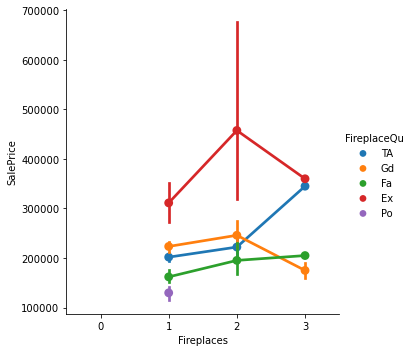

In [5]:
sns.factorplot("Fireplaces","SalePrice",data=data,hue="FireplaceQu");

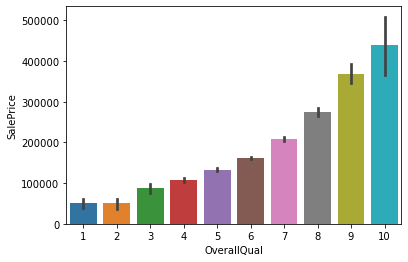

In [6]:
sns.barplot(data.OverallQual,data.SalePrice)

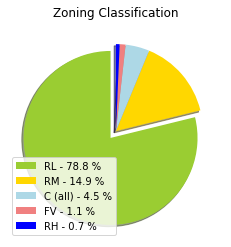

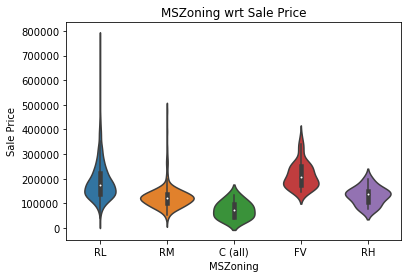

In [7]:
labels = data["MSZoning"].unique()
sizes = data["MSZoning"].value_counts().values 
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue'] 
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
shadow=True,startangle=90) 
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification") 
plt.show()

sns.violinplot(data.MSZoning,data["SalePrice"])
plt.title("MSZoning wrt Sale Price") 
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");


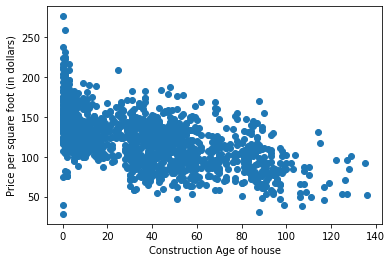

In [8]:
SalePriceSF = data['SalePrice']/data['GrLivArea']

ConstructionAge = data['YrSold'] - data['YearBuilt']
plt.scatter(ConstructionAge, SalePriceSF)
plt.ylabel('Price per square foot (in dollars)') 
plt.xlabel("Construction Age of house");


## Sale Price per square foot is low for old constructions

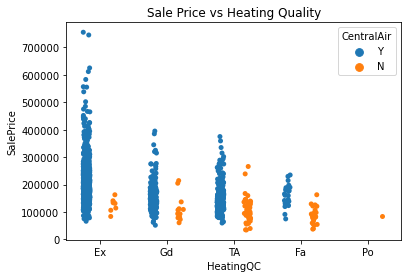

In [9]:
sns.stripplot(x="HeatingQC", y="SalePrice",data=data,hue='CentralAir',jitter=True,split=True)
plt.title("Sale Price vs Heating Quality");

### Sale Price is high where heating quality is excellent

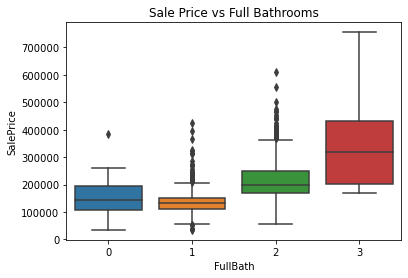

In [10]:
sns.boxplot(data["FullBath"],data["SalePrice"]) 
plt.title("Sale Price vs Full Bathrooms");

### Sale Price is high where number of bathrooms are more

Text(0.5, 1.0, 'Correlation between features')

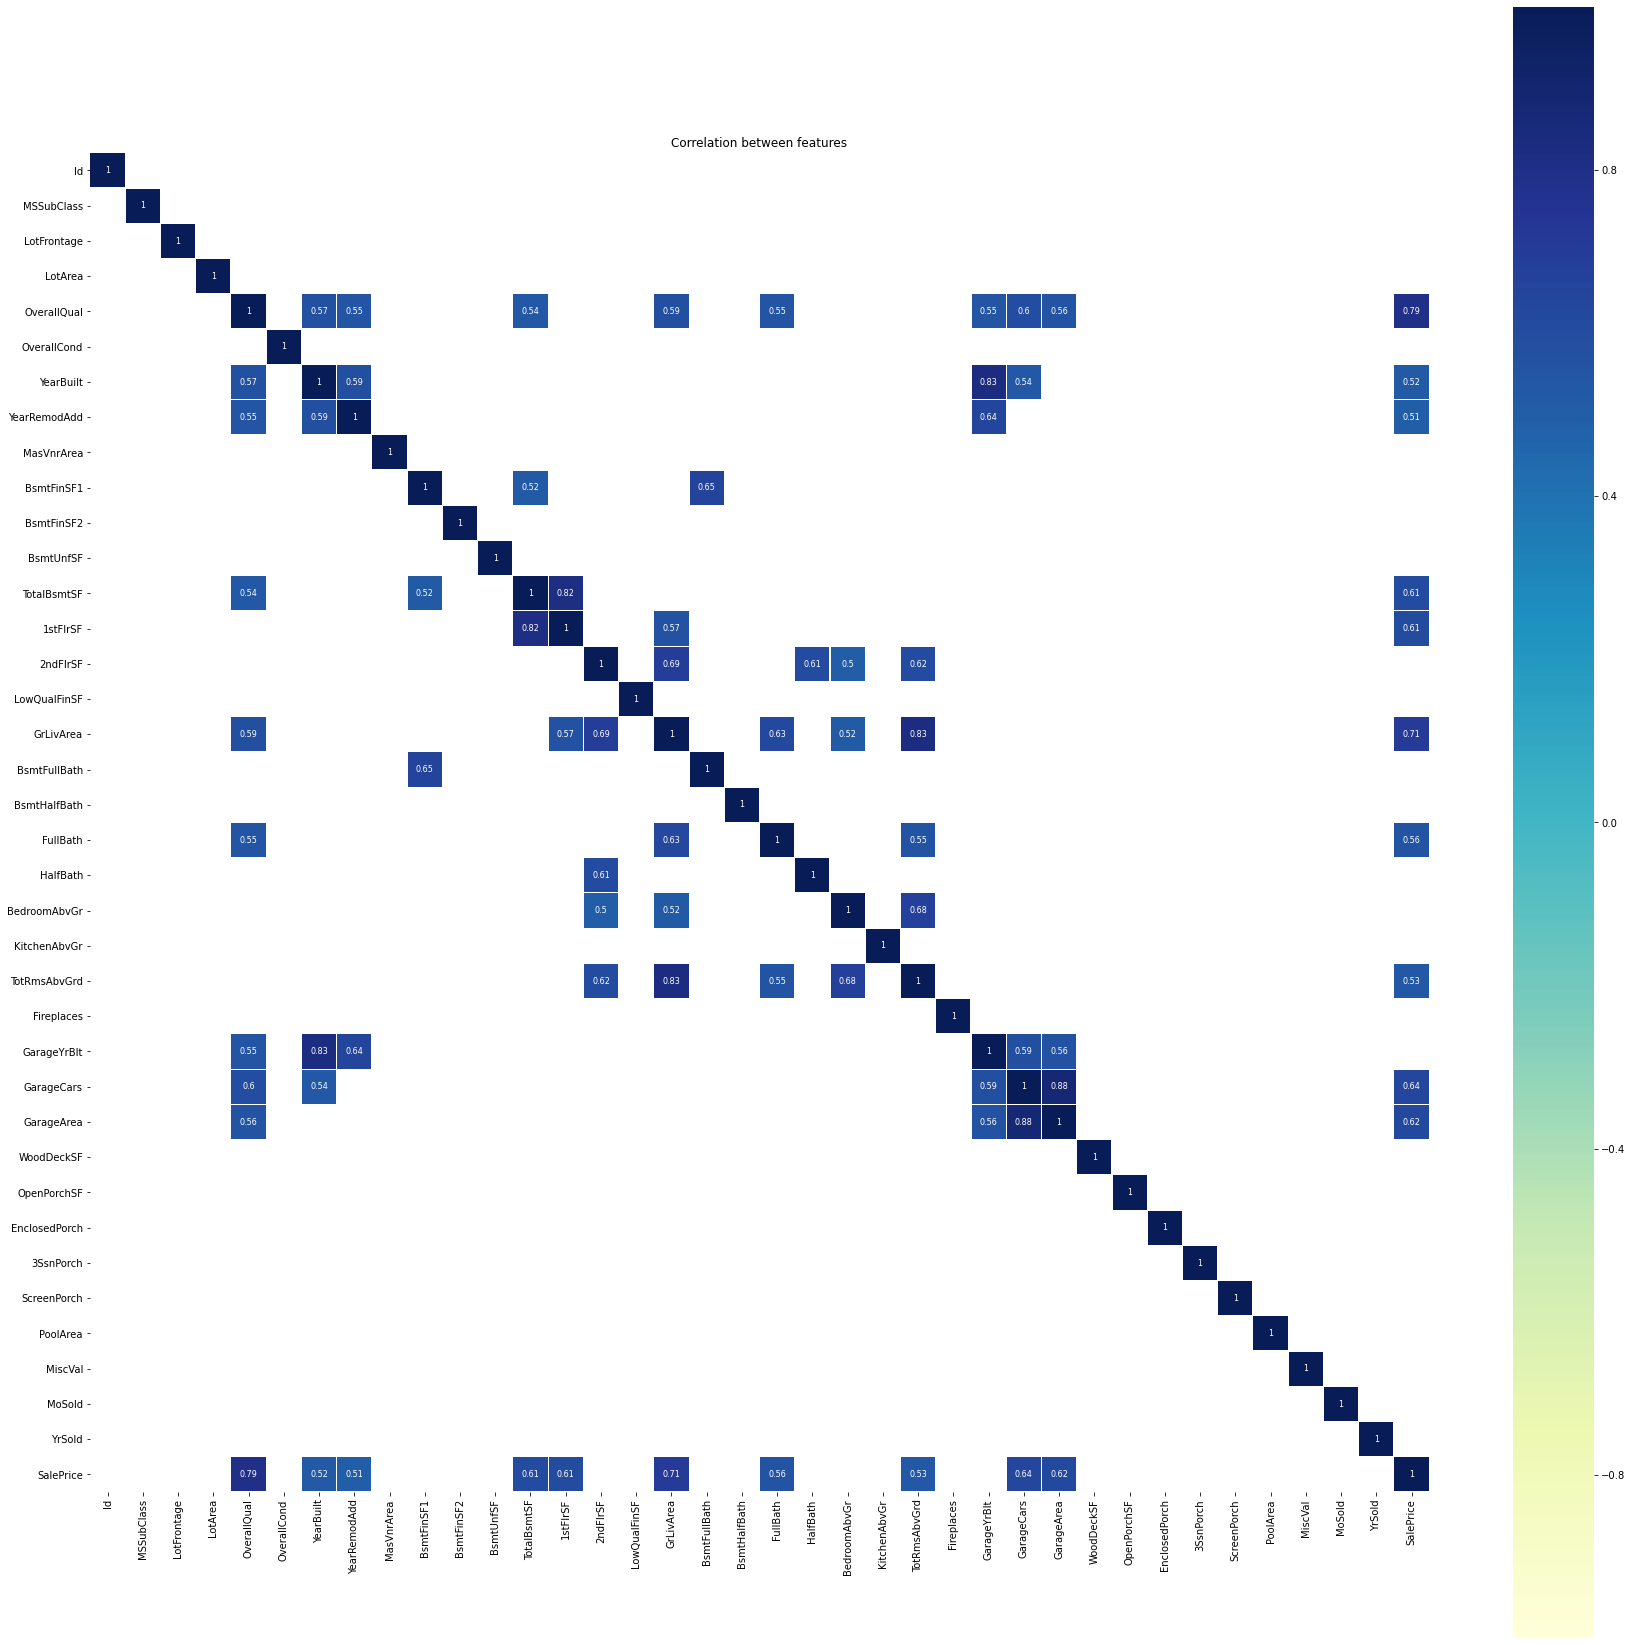

In [11]:
import matplotlib.pyplot as plt 
corr=data.corr() 
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')


#### Data Cleaning

In [12]:
print(data.MSSubClass.isnull().sum())
print(data.MSZoning.isnull().sum())
print(data.LotFrontage.isnull().sum())

0
0
259


70.04995836802665


(1460, 80)

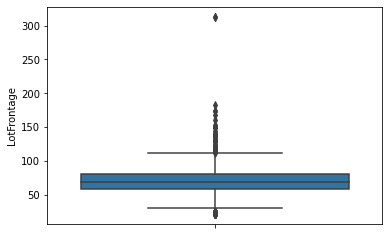

In [13]:
sns.boxplot(y=data.LotFrontage)
print(data.LotFrontage.mean())
data.shape


#### Removing outliers

In [14]:
data = data.loc[data['LotFrontage'] <200] 
data["LotFrontage"].fillna(data.LotFrontage.mean(), inplace = True) 
print(data.LotFrontage.mean())
data.shape



69.64470391993328


(1199, 80)

0
0


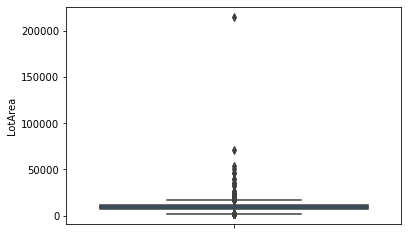

In [15]:
print(data.LotArea.isnull().sum())
print(data.LotFrontage.isnull().sum())
sns.boxplot(y=data.LotArea)


In [16]:
### removing outliers of lot area
data = data.loc[data['LotArea'] <70000] 
print(data['LotArea'].mean())
data.shape

9669.546365914786


(1197, 80)

In [17]:
print(data.Street.isnull().sum())
print(data.Alley.isnull().sum())
data = data.drop(['Alley'], axis =1)

data.shape

0
1111


(1197, 79)

In [18]:
print(data.LotShape.isnull().sum())
print(data.LandContour.isnull().sum())
print(data.Utilities.isnull().sum())
print(data.LotConfig.isnull().sum())
print(data.LandSlope.isnull().sum())
print(data.Neighborhood.isnull().sum())

print(data.Condition1.isnull().sum())
print(data.Condition2.isnull().sum())
print(data.BldgType.isnull().sum())

print(data.HouseStyle.isnull().sum())
print(data.OverallQual.isnull().sum())
print(data.OverallCond.isnull().sum())
print(data.YearBuilt.isnull().sum())
print(data.YearRemodAdd.isnull().sum())

print(data.RoofStyle.isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
6


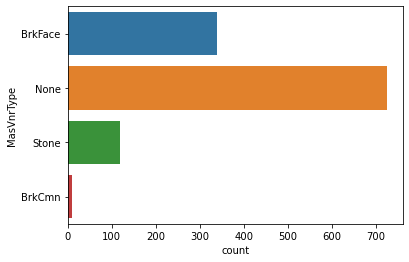

In [19]:
print(data.RoofMatl.isnull().sum())
print(data.Exterior1st.isnull().sum())
print(data.Exterior2nd.isnull().sum())
print(data.MasVnrType.isnull().sum())
sns.countplot(y='MasVnrType',data=data)
data["MasVnrType"].fillna(data.MasVnrType.mode(), inplace = True) 
##dropping Massvnr type because most have None type which means null
data =data.drop(['MasVnrType'],axis=1)



6


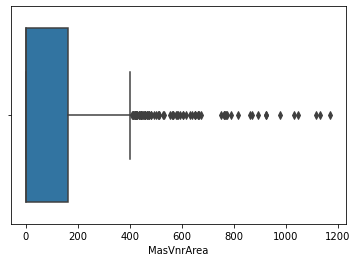

In [20]:
print(data.MasVnrArea.isnull().sum())
data = data.loc[data['MasVnrArea'] <1200] 
data["MasVnrArea"].fillna(data.MasVnrArea.mean(), inplace = True) 

sns.boxplot(data.MasVnrArea)

In [21]:
print(data.ExterQual.isnull().sum())
print(data.ExterCond.isnull().sum())
print(data.BsmtQual.isnull().sum())
print(data.BsmtCond.isnull().sum())
data["BsmtQual"].fillna('TA', inplace = True) 
data["BsmtCond"].fillna('TA', inplace = True) 
data["BsmtFinType1"].fillna('Unf', inplace = True) 

print(data.BsmtFinType1.isnull().sum())

print(data.BsmtFinSF1.isnull().sum())

0
0
31
31
0
0


(1189, 78)
(1181, 78)


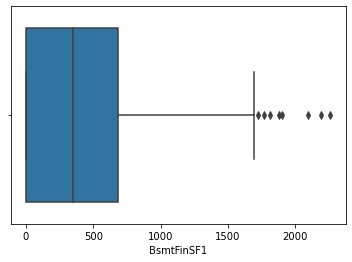

In [22]:
sns.boxplot(data.BsmtFinSF1)

print(data.shape)
data = data.loc[data['BsmtFinSF1'] <1700] 
print(data.shape)

In [23]:

data.BsmtFinType2.mode()
data["BsmtFinType2"].fillna('Unf', inplace = True) 
print(data.BsmtFinType2.isnull().sum())

0


(1181, 78)
(1180, 78)


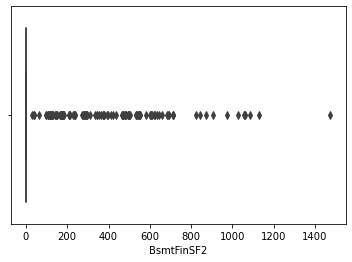

In [24]:
sns.boxplot(data.BsmtFinSF2)
print(data.shape)
data = data.loc[data['BsmtFinSF2'] <1200] 
print(data.shape)


0
(1180, 78)
(1174, 78)


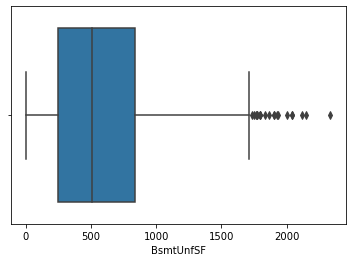

In [25]:
print(data.BsmtUnfSF.isnull().sum())
sns.boxplot(data.BsmtUnfSF)
print(data.shape)
data = data.loc[data['BsmtUnfSF'] <2000] 

print(data.shape)

0
(1174, 78)
(1170, 78)


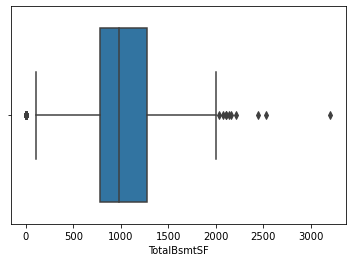

In [26]:

print(data.TotalBsmtSF.isnull().sum())
sns.boxplot(data.TotalBsmtSF)
print(data.shape)
data = data.loc[data['TotalBsmtSF'] <2200] 

print(data.shape)

In [27]:
print(data.Heating.isnull().sum())
print(data.HeatingQC.isnull().sum())
print(data.CentralAir.isnull().sum())
print(data.Electrical.isnull().sum())
print(data.Electrical.mode())
data["Electrical"].fillna('SBrkr', inplace = True) 



0
0
0


AttributeError: 'DataFrame' object has no attribute 'Electrical'

0
(1170, 78)
(1168, 78)


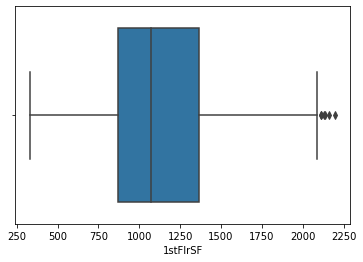

In [28]:



print(data['1stFlrSF'].isnull().sum())
sns.boxplot(data['1stFlrSF'])
print(data.shape)
data = data.loc[data['1stFlrSF'] <2150] 

print(data.shape)

0
(1168, 78)
(1166, 78)


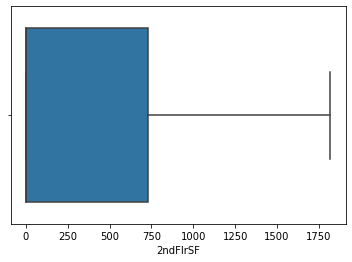

In [29]:


print(data['2ndFlrSF'].isnull().sum())
sns.boxplot(data['2ndFlrSF'])
print(data.shape)
data = data.loc[data['2ndFlrSF'] <1600] 

print(data.shape)

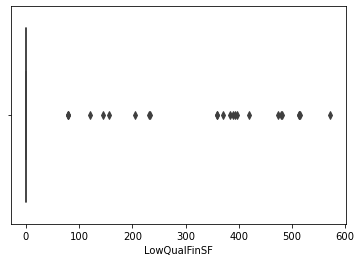

In [30]:
sns.boxplot(data['LowQualFinSF'])

data =data.drop(['LowQualFinSF'],axis =1) ### because most values are zero



0
(1166, 77)
(1163, 77)


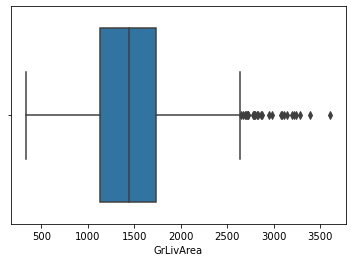

In [31]:

print(data['GrLivArea'].isnull().sum())
sns.boxplot(data['GrLivArea'])
print(data.shape)
data = data.loc[data['GrLivArea'] <3250] 

print(data.shape)

In [32]:
  
print(data['FireplaceQu'].isnull().sum())
data["FireplaceQu"].fillna('Gd', inplace = True) 

data['FireplaceQu'].mode()

594


0    Gd
dtype: object

In [33]:

print(data['GarageType'].isnull().sum())
data["GarageType"].fillna('Attchd', inplace = True) 

data['GarageType'].mode()


73


0    Attchd
dtype: object

In [34]:
### GarageYrBlt can be dropped because it does not have much importance
data =data.drop(['GarageYrBlt'],axis=1)



In [35]:
data.shape

(1163, 76)

In [36]:

print(data['GarageFinish'].isnull().sum())
data["GarageFinish"].fillna('Unf', inplace = True) 

data['GarageFinish'].mode()


73


0    Unf
dtype: object

(1163, 76)
(1161, 76)


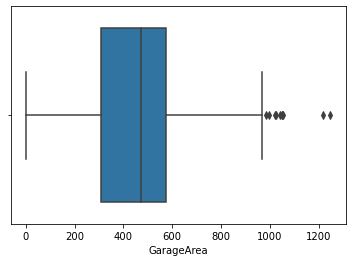

In [37]:

sns.boxplot(data['GarageArea'])
print(data.shape)
data = data.loc[data['GarageArea'] <1100] 

print(data.shape)

In [38]:


print(data['GarageCond'].isnull().sum())
data["GarageCond"].fillna('TA', inplace = True) 

data['GarageCond'].mode()


73


0    TA
dtype: object

(1161, 76)
(1157, 76)


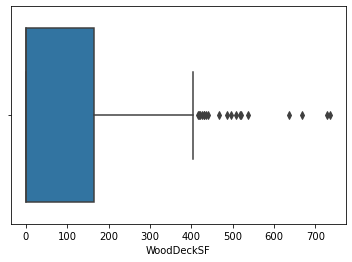

In [39]:

sns.boxplot(data['WoodDeckSF'])
print(data.shape)
data = data.loc[data['WoodDeckSF'] <600] 

print(data.shape)

In [40]:
print(data['BsmtExposure'].isnull().sum())
data['BsmtExposure'].mode()
data["BsmtExposure"].fillna('No', inplace = True) 


32


In [41]:
print(data['GarageQual'].isnull().sum())
data['GarageQual'].mode()
data["GarageQual"].fillna('TA', inplace = True) 


73


(1157, 76)
(1150, 76)


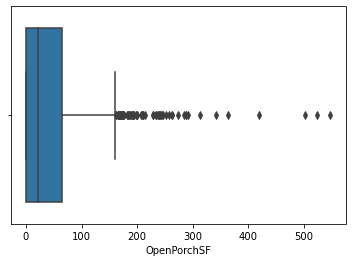

In [42]:

sns.boxplot(data['OpenPorchSF'])
print(data.shape)
data = data.loc[data['OpenPorchSF'] <300] 

print(data.shape)

(1150, 76)
(1147, 76)


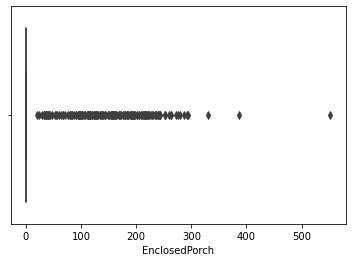

In [43]:

sns.boxplot(data['EnclosedPorch'])
print(data.shape)
data = data.loc[data['EnclosedPorch'] <300] 

print(data.shape)

1144
929
1111
0


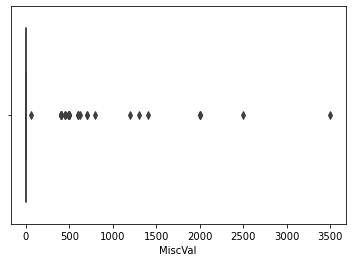

In [44]:
### dropping the variable where most values are null
data= data.drop(['ScreenPorch'],axis =1)
data= data.drop(['PoolArea'],axis =1)
data= data.drop(['3SsnPorch'],axis =1)




print(data['PoolQC'].isnull().sum())
data= data.drop(['PoolQC'],axis =1)

print(data['Fence'].isnull().sum())
data= data.drop(['Fence'],axis =1)
print(data['MiscFeature'].isnull().sum())
data= data.drop(['MiscFeature'],axis =1)
sns.boxplot(data.MiscVal)
print(data['MiscVal'].isnull().sum())


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 0 to 1458
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1147 non-null   int64  
 1   MSSubClass     1147 non-null   int64  
 2   MSZoning       1147 non-null   object 
 3   LotFrontage    1147 non-null   float64
 4   LotArea        1147 non-null   int64  
 5   Street         1147 non-null   object 
 6   LotShape       1147 non-null   object 
 7   LandContour    1147 non-null   object 
 8   Utilities      1147 non-null   object 
 9   LotConfig      1147 non-null   object 
 10  LandSlope      1147 non-null   object 
 11  Neighborhood   1147 non-null   object 
 12  Condition1     1147 non-null   object 
 13  Condition2     1147 non-null   object 
 14  BldgType       1147 non-null   object 
 15  HouseStyle     1147 non-null   object 
 16  OverallQual    1147 non-null   int64  
 17  OverallCond    1147 non-null   int64  
 18  YearBuil

In [46]:
missingColNames = list([col for col in data.columns if data[col].isnull().any()])
missingColNames



[]

In [47]:
allCols = list([col for col in data.columns])

In [48]:
numericalCols =['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'
               ,'2ndFlrSF','WoodDeckSF','OpenPorchSF','EnclosedPorch','MiscVal']

In [49]:
catCols = ['MSZoning','LandContour','Utilities','LotConfig','LandSlope','BldgType','ExterQual',
              'ExterCond','Heating','CentralAir','Functional','GarageFinish',
              'PavedDrive','SaleType','LotShape','Street']

In [50]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
  
le = LabelEncoder()

data['GarageCond'] = le.fit_transform(data['GarageCond'])
data['Neighborhood'] = le.fit_transform(data['Neighborhood'])
data['Condition1'] = le.fit_transform(data['Condition1'])
data['Condition2'] = le.fit_transform(data['Condition2'])
data['HouseStyle'] = le.fit_transform(data['HouseStyle'])
data['RoofStyle'] = le.fit_transform(data['RoofStyle'])
data['RoofMatl'] = le.fit_transform(data['RoofMatl'])
data['Exterior1st'] = le.fit_transform(data['Exterior1st'])
data['Exterior2nd'] = le.fit_transform(data['Exterior2nd'])
data['Foundation'] = le.fit_transform(data['Foundation'])

data['BsmtCond'] = le.fit_transform(data['BsmtCond'])
data['BsmtQual'] = le.fit_transform(data['BsmtQual'])
data['BsmtExposure'] = le.fit_transform(data['BsmtExposure'])

data['BsmtFinType1'] = le.fit_transform(data['BsmtFinType1'])
data['BsmtFinType2'] = le.fit_transform(data['BsmtFinType2'])
data['HeatingQC'] = le.fit_transform(data['HeatingQC'])
data['KitchenQual'] = le.fit_transform(data['KitchenQual'])
data['FireplaceQu'] = le.fit_transform(data['FireplaceQu'])

data['GarageType'] = le.fit_transform(data['GarageType'])
data['GarageQual'] = le.fit_transform(data['GarageQual'])

data['YrSold'] = le.fit_transform(data['YrSold'])
data['SaleCondition'] = le.fit_transform(data['SaleCondition'])



In [51]:
data.Neighborhood

0        5
1       24
2        5
3        6
4       15
        ..
1454    21
1455     8
1456    14
1457     6
1458    12
Name: Neighborhood, Length: 1147, dtype: int32

In [52]:
data1 =data[catCols]


In [53]:
data1 = pd.get_dummies(data1, prefix_sep='_', drop_first=True)

In [54]:
data1['Id'] =data['Id']


In [55]:
cleanData = pd.merge(data,data1,how="inner",on="Id")


In [56]:
cleanData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Pave
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,5,2,2,1Fam,5,7,5,2003,2003,1,0,12,13,196.0,Gd,TA,2,2,3,3,2,706,5,0,150,856,GasA,0,Y,856,854,1710,1,0,2,1,3,1,2,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,24,1,2,1Fam,2,6,8,1976,1976,1,0,8,8,0.0,TA,TA,1,2,3,1,0,978,5,0,284,1262,GasA,0,Y,1262,0,1262,0,1,2,0,3,1,3,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,5,2,2,1Fam,5,7,5,2001,2002,1,0,12,13,162.0,Gd,TA,2,2,3,2,2,486,5,0,434,920,GasA,0,Y,920,866,1786,1,0,2,1,3,1,2,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,6,2,2,1Fam,5,7,5,1915,1970,1,0,13,15,0.0,TA,TA,0,3,1,3,0,216,5,0,540,756,GasA,2,Y,961,756,1717,1,0,1,0,3,1,2,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,15,2,2,1Fam,5,8,5,2000,2000,1,0,12,13,350.0,Gd,TA,2,2,3,0,2,655,5,0,490,1145,GasA,0,Y,1145,1053,2198,1,0,2,1,4,1,2,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [57]:

cleanData =cleanData.drop(catCols,axis=1)

In [58]:
#cleanData.to_csv('a.csv')

In [59]:
cleanData.isnull().sum()

Id              0
MSSubClass      0
LotFrontage     0
LotArea         0
Neighborhood    0
               ..
SaleType_WD     0
LotShape_IR2    0
LotShape_IR3    0
LotShape_Reg    0
Street_Pave     0
Length: 104, dtype: int64

## Data Visualization

In [60]:
numericalCols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'MiscVal']

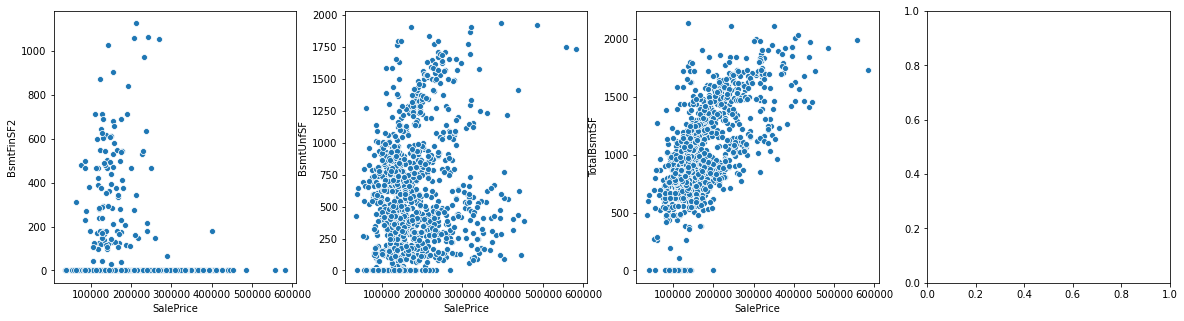

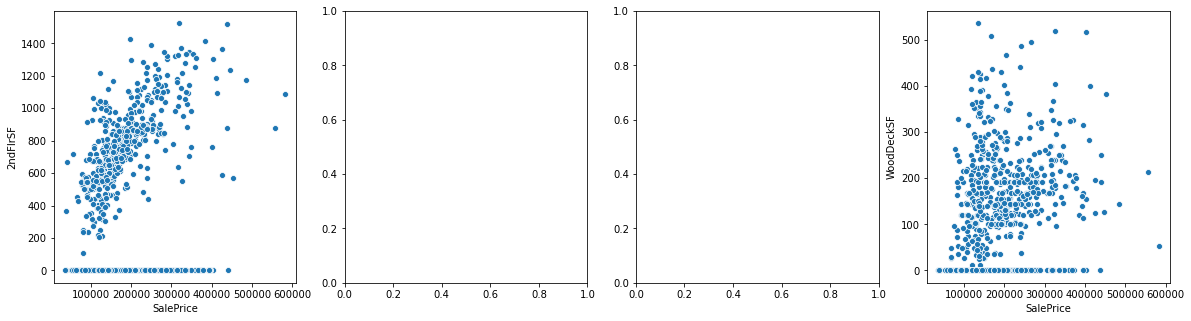

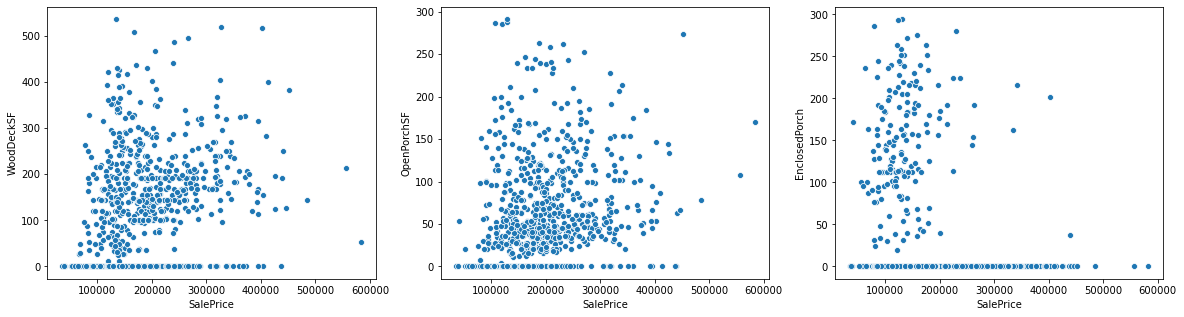

In [61]:
plt.rc('figure', figsize=(20, 5))
fig, axes =plt.subplots(1,4)


sns.scatterplot(y='BsmtFinSF2',x='SalePrice',data=cleanData,ax= axes[0])
sns.scatterplot(y='BsmtUnfSF',x='SalePrice',data=cleanData,ax= axes[1])
sns.scatterplot(y='TotalBsmtSF',x='SalePrice',data=cleanData,ax= axes[2])
plt.rc('figure', figsize=(20, 5))
fig, axes =plt.subplots(1,4)


sns.scatterplot(y='2ndFlrSF',x='SalePrice',data=cleanData,ax= axes[0])
sns.scatterplot(y='WoodDeckSF',x='SalePrice',data=cleanData,ax= axes[3])

plt.rc('figure', figsize=(20, 5))
fig, axes =plt.subplots(1,3)


sns.scatterplot(y='WoodDeckSF',x='SalePrice',data=cleanData,ax= axes[0])
sns.scatterplot(y='OpenPorchSF',x='SalePrice',data=cleanData,ax= axes[1])
sns.scatterplot(y='EnclosedPorch',x='SalePrice',data=cleanData,ax= axes[2])


### There is a linear relation between numerical columns so linear regression can also fetch us good result

In [62]:


highSalePriceDf = cleanData.loc[cleanData['SalePrice'] > np.percentile(cleanData.SalePrice, 80) ] 


In [63]:
highSalePriceDf.shape

(227, 104)

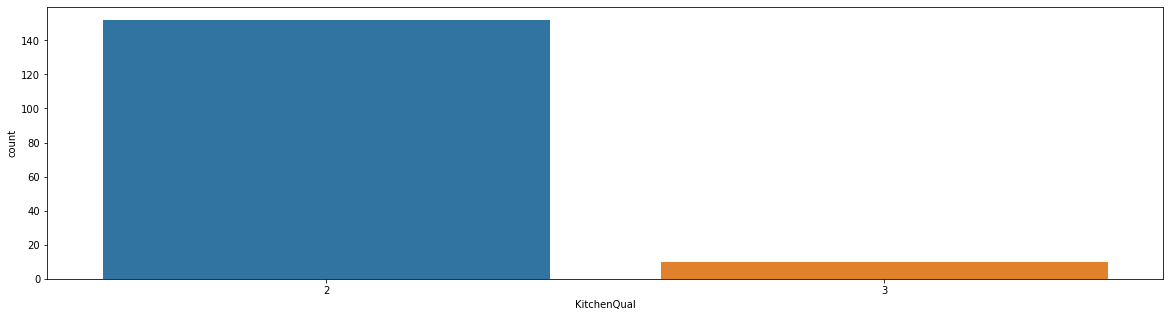

In [64]:
#### Kitchen Quality of Customer having sale price in more then 50 percentile
#KitchenQual
kitchenQualityDf = highSalePriceDf.loc[highSalePriceDf['KitchenQual'] >0 ] 
sns.countplot(x= 'KitchenQual',data=kitchenQualityDf )

### Kitchen Quality of value 2 denotes mean kitchen is of good quality and value 3 denotes typical/average quality
### The above graph shows that kitchen qualityis good or average where sale price is high

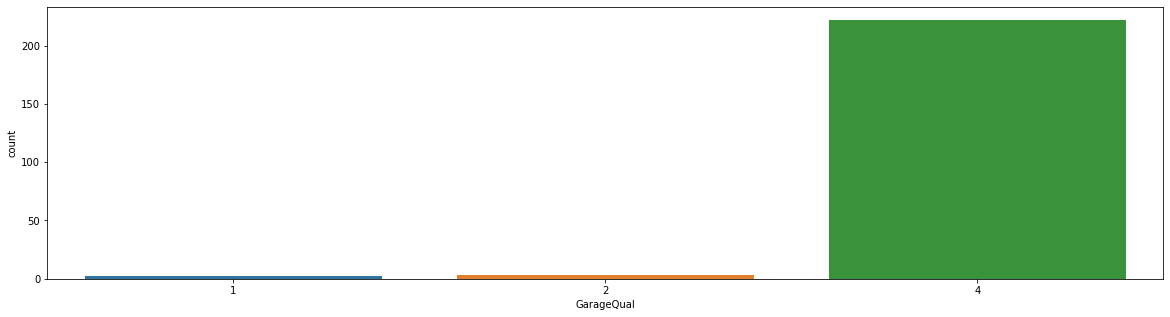

In [65]:
#### Kitchen Quality of Customer having sale price in more then 50 percentile
#KitchenQual
garageQualityDf = highSalePriceDf.loc[highSalePriceDf['GarageQual'] >0 ] 
sns.countplot(x= 'GarageQual',data=garageQualityDf )

####  The garage is of average quality where sale price is high

In [66]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [67]:
scaler = StandardScaler()

cleanData[numericalCols] =scaler.fit_transform(cleanData[numericalCols])


In [68]:
cleanData = cleanData.drop(['Id'],axis =1)

In [69]:
cleanData =cleanData.drop(['Heating_OthW'],axis =1)
df_train,df_test= train_test_split(cleanData,train_size=0.7,random_state = 100)

In [70]:
df_train.shape

(802, 102)

In [71]:
y_train = df_train.pop('SalePrice')
X_train =df_train
y_test = df_test.pop('SalePrice')
X_test =df_test

In [88]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [89]:
y_train_price = rfe.predict(X_train)

In [90]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_price)

0.8116013049019893

Text(0.5, 0, 'Errors')

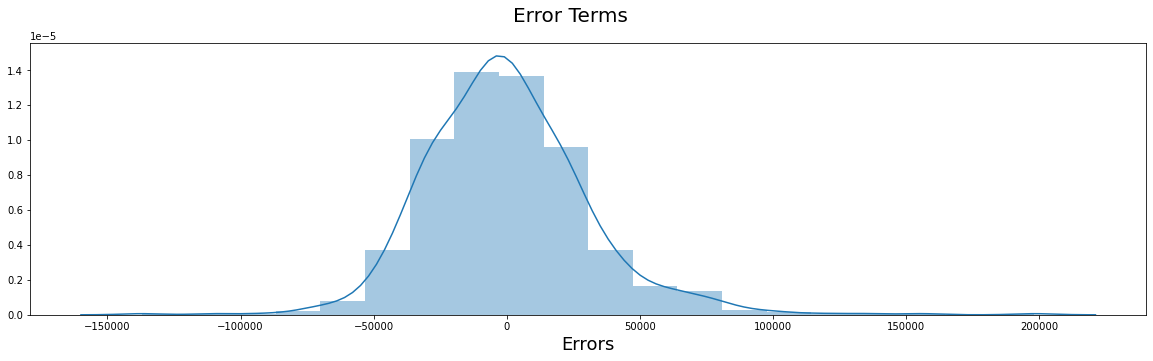

In [91]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [92]:
col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]
X_train_rfe.shape

(802, 15)

In [93]:
X_train.shape

(802, 101)

In [94]:
rfe = rfe.fit(X_train_rfe, y_train)

In [95]:
y_train_price = rfe.predict(X_train_rfe)
r2_score(y_train,y_train_price)

0.8116013049019893

In [96]:
X_test_rfe = X_test[col]
y_test_pred = rfe.predict(X_test_rfe)


In [97]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error( y_test_pred,y_test))
r2_score( y_test_pred,y_test)

1078282676.7359092


0.7797631672859524

In [98]:
from sklearn.metrics import mean_squared_error
mean_squared_error( y_test_pred,y_test)

1078282676.7359092

In [99]:
X_test_rfe.columns

Index(['OverallQual', 'TotalBsmtSF', '2ndFlrSF', 'MSZoning_RL', 'BldgType_2fmCon', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'Heating_GasW', 'Heating_Wall', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New', 'Street_Pave'], dtype='object')

In [100]:
testData1=pd.read_csv('test.csv')


In [101]:
testData1 =testData1.drop(['Alley',
'MasVnrType',
'LowQualFinSF',
'GarageYrBlt',
'ScreenPorch',
'PoolArea',
'3SsnPorch',
'PoolQC',
'Fence',
'MiscFeature',
'MiscVal'
],axis =1)

In [102]:
testData1['GarageCond'] =testData1['GarageCond'].astype(str)
testData1['BsmtCond'] =testData1['BsmtCond'].astype(str)

testData1['Exterior1st'] =testData1['Exterior1st'].astype(str)

testData1['Exterior2nd'] =testData1['Exterior2nd'].astype(str)
testData1['BsmtQual'] =testData1['BsmtQual'].astype(str)

testData1['BsmtExposure'] =testData1['BsmtExposure'].astype(str)

testData1['BsmtFinType1'] =testData1['BsmtFinType1'].astype(str)

testData1['BsmtFinType2'] =testData1['BsmtFinType2'].astype(str)
testData1['KitchenQual'] =testData1['KitchenQual'].astype(str)
testData1['FireplaceQu'] =testData1['FireplaceQu'].astype(str)

testData1['GarageType'] =testData1['GarageType'].astype(str)

testData1['GarageQual'] =testData1['GarageQual'].astype(str)





testData1['GarageCond'] = le.fit_transform(testData1['GarageCond'])
testData1['Neighborhood'] = le.fit_transform(testData1['Neighborhood'])
testData1['Condition1'] = le.fit_transform(testData1['Condition1'])
testData1['Condition2'] = le.fit_transform(testData1['Condition2'])
testData1['HouseStyle'] = le.fit_transform(testData1['HouseStyle'])
testData1['RoofStyle'] = le.fit_transform(testData1['RoofStyle'])
testData1['RoofMatl'] = le.fit_transform(testData1['RoofMatl'])
testData1['Exterior1st'] = le.fit_transform(testData1['Exterior1st'])
testData1['Exterior2nd'] = le.fit_transform(testData1['Exterior2nd'])
testData1['Foundation'] = le.fit_transform(testData1['Foundation'])

testData1['BsmtCond'] = le.fit_transform(testData1['BsmtCond'])
testData1['BsmtQual'] = le.fit_transform(testData1['BsmtQual'])
testData1['BsmtExposure'] = le.fit_transform(testData1['BsmtExposure'])

testData1['BsmtFinType1'] = le.fit_transform(testData1['BsmtFinType1'])
testData1['BsmtFinType2'] = le.fit_transform(testData1['BsmtFinType2'])
testData1['HeatingQC'] = le.fit_transform(testData1['HeatingQC'])
testData1['KitchenQual'] = le.fit_transform(testData1['KitchenQual'])
testData1['FireplaceQu'] = le.fit_transform(testData1['FireplaceQu'])

testData1['GarageType'] = le.fit_transform(testData1['GarageType'])
testData1['GarageQual'] = le.fit_transform(testData1['GarageQual'])

testData1['YrSold'] = le.fit_transform(testData1['YrSold'])
testData1['SaleCondition'] = le.fit_transform(testData1['SaleCondition'])


In [103]:
testData2 =testData1[catCols]

testData2 = pd.get_dummies(testData2, prefix_sep='_', drop_first=True)

testData2.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Heating_GasW', 'Heating_Grav', 'Heating_Wall', 'CentralAir_Y', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'GarageFinish_RFn', 'GarageFinish_Unf', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'Street_Pave'], dtype='object')

In [104]:
testData2['Id'] =testData1['Id']
testData1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], dtype='object')

In [105]:

numericalCols.remove('MiscVal')


testData1[numericalCols] =scaler.fit_transform(testData1[numericalCols])


In [106]:

testData1[numericalCols] =scaler.transform(testData1[numericalCols])


In [107]:
testData1 =testData1.drop(catCols,axis=1)


In [108]:
finTestData = pd.merge(testData1,testData2,how="inner",on="Id")
trrData = pd.merge(testData1,testData2,how="inner",on="Id")

finTestData.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'OverallQual', 'OverallCond',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'Street_Pave'], dtype='object', length=103)

In [109]:
finTestData = finTestData[col]

finTestData.isnull().sum()


OverallQual        0
TotalBsmtSF        1
2ndFlrSF           0
MSZoning_RL        0
BldgType_2fmCon    0
ExterQual_Fa       0
ExterQual_Gd       0
ExterQual_TA       0
Heating_GasW       0
Heating_Wall       0
SaleType_CWD       0
SaleType_Con       0
SaleType_ConLD     0
SaleType_New       0
Street_Pave        0
dtype: int64

In [110]:
finTestData.isnull().sum()
finTestData["TotalBsmtSF"].fillna(0, inplace = True) 
y_submission_pred = rfe.predict(finTestData)

In [111]:

y_submission_pred = pd.Series(y_submission_pred)
y_submission_pred.to_csv('result1.csv')

In [112]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [518]:

decisionTree = DecisionTreeRegressor(random_state=30)

params= {'max_depth':[4,5,6,7,9,10],'max_features':[3,5,7,8,10],'min_samples_split':[10,15,20,40,50]}
model = GridSearchCV(estimator  = decisionTree,cv = 4,param_grid=params,scoring='r2')
model.fit(X_train_rfe,y_train)

model.best_params_
model.best_score_
model.best_params_


{'max_depth': 9, 'max_features': 7, 'min_samples_split': 15}

In [519]:
model.best_score_


0.7659143861081807

In [520]:
#regr_2 = DecisionTreeRegressor(max_depth=7,max_features = 8)
#regr_2 = DecisionTreeRegressor(max_depth=6,max_features = 10,random_state=30)
regr_2 = DecisionTreeRegressor(max_depth=9,max_features = 7,random_state=30,min_samples_split= 15)
regr_2.fit(X_train_rfe, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=7,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=30, splitter='best')

In [521]:
y_pred_train = regr_2.predict(X_train_rfe)
r2_score(y_train,y_pred_train)

0.8623704359600847

In [522]:
y_test_pred = regr_2.predict(X_test_rfe)
r2_score(y_test,y_test_pred)
mean_squared_error(y_test,y_test_pred)

1072687641.8754193

In [523]:
r2_score(y_test,y_test_pred)

#1148849454.2030096
#1072687641.8754193

0.8179335962560075

In [524]:
y_submission_pred = regr_2.predict(finTestData)

In [525]:

y_submission_pred = pd.Series(y_submission_pred)
y_submission_pred.to_csv('resultDt.csv')

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [547]:
rfc=RandomForestRegressor(random_state=100)

###Finding the Best Paramters for Random Forest
params={'n_estimators':[5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6,7,8],'max_features':[3,5,7,8,10]}
model = GridSearchCV(estimator  = rfc,cv = 10,param_grid=params,scoring='r2')
model.fit(X_train_rfe,y_train)
print(model.best_params_)
model.best_score_


{'max_features': 5, 'min_samples_split': 6, 'n_estimators': 10}


0.8146691081662403

In [114]:
#rf =RandomForestRegressor(random_state = 100,n_estimators =10,max_features = 8,min_samples_split=25)
rf =RandomForestRegressor(random_state = 100,n_estimators =10,max_features = 8,min_samples_split=5)
rf.fit(X_train_rfe,y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

In [115]:
y_pred_train = rf.predict(X_train_rfe)
r2_score(y_train,y_pred_train)

0.9333734669700396

In [116]:
y_test_pred = rf.predict(X_test_rfe)
print(r2_score(y_test,y_test_pred))
print(mean_squared_error(y_test,y_test_pred))


0.865485340363597
792525200.0140572


In [560]:
y_submission_pred = regr_2.predict(finTestData)

y_submission_pred = pd.Series(y_submission_pred)
y_submission_pred.to_csv('resultRandomForest.csv')

PermissionError: [Errno 13] Permission denied: 'resultRandomForest.csv'

In [98]:
import pickle 
Pkl_Filename = "housePredictorUsingRandomFores.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf, file)


In [117]:
X_test_rfe.columns

Index(['OverallQual', 'TotalBsmtSF', '2ndFlrSF', 'MSZoning_RL', 'BldgType_2fmCon', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'Heating_GasW', 'Heating_Wall', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New', 'Street_Pave'], dtype='object')

In [562]:

finTestData = finTestData[col]
finTestData.shape

(1459, 15)